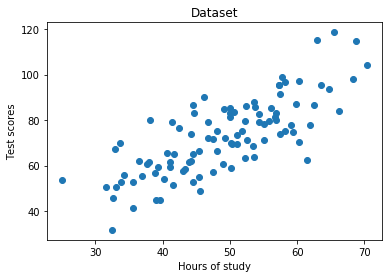

In [5]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv('data.csv', header=None).values
X  = df[:, 0]
y  = df[:, 1]#Plot the dataset
plt.scatter(X,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

Optimized theta [0.97247667 1.46037837]
Minimized Cost: 56.05855469882501


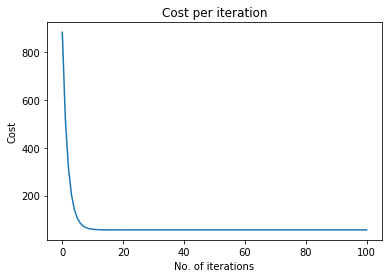

In [6]:
# Vectorized Functions:
def Normalize(v):
    return ((v - np.mean(v)) / np.std(v))

def Hypothesis(X, theta):
    return np.dot(X, theta)

def CostFunction(X, y, theta, m):
    h = Hypothesis(X, theta)
    cost = np.dot((h - y).T, h - y) / (2 * m)
    return cost

def GradientDescent(X, y, theta, alpha, num_iters):
    costs = []
    for i in range(num_iters):
        costs.append(CostFunction(X, y, theta, m))
        delta = np.dot(X.T, (Hypothesis(X, theta) - y))
        grad  = (alpha / m) * delta
        theta = theta - grad
    costs.append(CostFunction(X, y, theta, m))
    return theta, costs

X_train = np.column_stack([np.ones(X.shape[0]), X])
y_train = y
m, n    = X_train.shape

# YOU CAN CHANGE alpha (learning rate) and the number of iteration
# Result can change depends on these values
# If alpha = 0.001, you can see divergence / cost will not converge to minimum
np.random.seed(499)
theta = np.random.rand(n)
alpha = 0.0001
num_iters = 100

theta, costs = GradientDescent(X_train, y_train, theta, alpha, num_iters)
print('Optimized theta', theta)
print('Minimized Cost:', CostFunction(X_train, y_train, theta, m))

plt.plot(costs)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

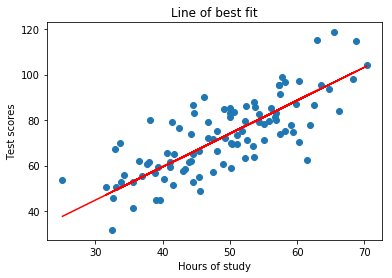

In [7]:
def predict(X, theta):
    return np.dot(X, theta)

pred = predict(X_train, theta)
plt.scatter(X, y)
plt.plot(X, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

In [8]:
testScore = predict(4, theta)
testScore

array([3.88990667, 5.84151349])